<a href="https://colab.research.google.com/github/Kalidsa/Projeto-de-Minera-o-de-Textos---CDII/blob/main/Minera%C3%A7%C3%A3o_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo geral -  trabalho de mineração de textos


---



**Aluna: Kalidsa Oliveira**

**Curso: Engenharia de Computação**

 **Disciplina: Ciência de dados II**



---

Este trabalho tem por objetivo desenvolver e avaliar os seus conhecimentos e
habilidades em relação a aplicação das etapas do processo de KDT (Knowledge Discovery
in Texts) estudadas em aula: seleção, limpeza, transformação, mineração e
interpretação de dados. Trata-se, portanto, de um projeto de mineração de textos.

Para tanto, foram coletados 300 comentários de usuários para cada um dos
aplicativos supracitados, totalizando 3.000 comentários. Para cada comentário,
avaliadores humanos o classificaram em uma polaridade (positivo ou negativo) e em
uma emoção de acordo com as emoções básicas de Ekman e Cordaro (2011) que são:

• Felicidade: Representa uma experiência gratificante e positiva para o usuário ao usar o aplicativo;

• Surpresa: Indica uma reação inesperada e positiva do usuário durante a utilização do aplicativo;

• Tristeza: Reflete o sentimento de descontentamento ou a ausência de uma característica desejada no aplicativo, mas mantém uma apreciação geral pelo aplicativo;

• Neutro: Caracteriza a neutralidade na avaliação, com a ausência de manifestações emocionais;

• Medo: Sinaliza a presença de medo ou insegurança por parte do usuário relacionado ao uso do aplicativo;

• Nojo: Descreve uma sensação desagradável causada por uma
característica do aplicativo, prejudicando a experiência do usuário;

• Raiva: Atribuída quando há um nível notável de agressividade na
avaliação do usuário.

---
**O que você deve ser feito:**


*   BoW + NaiveBayes
*   TF-IDF + NaiveBayes
*   BoW + KNN
*   TF-IDF + KNN
*   Rede neural com embedding (Word2Vec, GloVe, Doc2Vec) (falta fazer)
*   BERTimbau (falta fazer)
*   LLama (falta fazer)

**--> Rede neural com embedding (Word2Vec, GloVe, Doc2Vec):** Pesquise, descreva o que são e escolha o que melhor se
adequar aos dados disponíveis e ao algoritmo de rede neural escolhido para PLN.

--> Representar a mesma base de comentários, utilizando o modelo TF-IDF e testar novamente a estratégia de predição usando o algoritmo NaiveBayes do código base. Repetir utilizando o algoritmo KNN.

--> Usar modelos pré-treinados avançados como o BERTimbau e o Llamma.

--> Analisar os resultados obtidos em termos de performance (precisão, revocação, medida-F e matriz de confusão).

--> Usar o método de amostragem mais adequado de acordo com o problema (holdout, cross-validation ou
estratificado). Justificar escolha!

--> Comparar as estratégias de predição em termos de performance e escolher aquela com maior performance para realizar a predição de três comentários não existentes no conjunto original de treino. Avalie qualitativamente se o comentário que você escolheu condiz com a emoção e a polaridade determinadas pelo algoritmo.




---

#Dados que devem ser analisados:



1.  **Precisão:** A precisão mede a proporção de verdadeiros positivos entre todos os itens classificados como positivos pelo modelo. Em outras palavras, é a taxa de acertos do modelo para cada classe. Uma alta precisão significa que a maioria das previsões positivas são corretas.


2.  **Recall:** Mede a proporção de verdadeiros positivos entre todos os itens que realmente pertencem à classe positiva. Em outras palavras, é a capacidade do modelo de encontrar todos os itens positivos.



3.  **F1-Score:** é a média harmônica da precisão e do recall.

4.  **Support:** O número de ocorrências reais de cada classe no conjunto de teste.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carregamento dos dados
O código abaixo lê o arquivo CSV avaliacoes_playStore.csv em um DataFrame e exibe as primeiras cinco linhas desse DataFrame.

In [ ]:
import pandas as pd
data_content = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apps_reviews.csv', sep=',')
data_content

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,Não funciona!! Reconhimento facial diz que nen...,negative,disgust,NaN
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,A experiência com o App não está sendo boa. El...,negative,disgust,NaN
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,"Não consigo logar de jeito nenhum, o código de...",negative,disgust,NaN
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,Funcionava até ultima atualização. Por algum m...,negative,disgust,NaN


In [ ]:
data_content.describe() #estatísticas descritivas do dataframe

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [ ]:
data_content.loc[0, 'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

#Limpeza de dados


In [ ]:
data_content.duplicated().sum() #verificação de objetos duplicados

0

In [ ]:
data_content.isnull().any() #listagem de objetos nulos

reviewId              False
app_name              False
content               False
sentiment_polarity    False
sentiment             False
Unnamed: 5             True
dtype: bool

In [ ]:
data_content.info() #informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
 5   Unnamed: 5          1 non-null      object
dtypes: object(6)
memory usage: 141.3+ KB


In [ ]:
#novo dataframe recebendo o primeiro para realizar a limpeza e transformação de dados
data_content2 = pd.DataFrame(data_content)

columns_to_drop = [
    'Unnamed: 5'
]

data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
dtypes: object(5)
memory usage: 117.7+ KB


## Pré-processamento

Remoção dos caracteres que não são latinos e colocando todas as palavras para minúsculas

In [ ]:
import regex # trabalhar com expressões regulares
data_content2['content'] = data_content2['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

data_content2['content'] = data_content2['content'].apply(lambda x: str(x).lower())

data_content2.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

data_content2['content'] = data_content2['content'].apply(remove_stopwords)

data_content2.loc[0, 'content']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Exploração de dados

Abaixo são gerados gráficos para as váriavies categóricas: sentiment e sentiment_polarity, para podermos explorar através dos histogramas a contagem desses valores separados nas suas categorias.





In [ ]:
import plotly.express as px

px.histogram(data_content2, x='sentiment')

In [ ]:
px.histogram(data_content2, x='sentiment_polarity')

In [ ]:
px.histogram(data_content2, x = 'sentiment', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [ ]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [ ]:
px.histogram(data_content2, x = 'app_name', text_auto = True, color = 'sentiment',  barmode = 'group')


# Formatação de dados

Para as colunas de sentiment_polarity e sentiment

sentiment_polarity = [negative, neutral, positive]

sentiment = [ anger, disgust, fear, happiness, neutral, sadness]


#1.  Transformando a coluna sentiment_polarity, que é ordinal, para númerica utilizando o OrdinalEncoder

In [ ]:
data_content2['sentiment_polarity'].value_counts() #contagem dos valores na coluna

sentiment_polarity
negative    1742
positive    1187
neutral       82
Name: count, dtype: int64

In [ ]:
sent_pol_val = data_content2['sentiment_polarity'].unique() #valores únicos da coluna
sent_pol_val

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

sent_pol = {'sentiment_polarity':[sent_pol_val[0], sent_pol_val[2], sent_pol_val[1]]}

sent_pol_dtf = pd.DataFrame(sent_pol, columns=['sentiment_polarity'])
sent_pol_dtf

,sentiment_polarity
0,positive
1,neutral
2,negative


In [ ]:
# mapeamento dos valores da coluna sentiment_polarity para seus índices correspondentes
# criando uma nova coluna chamada sp_ordinal no DataFrame sent_pol_dtf

sent_pol_dtf['sp_ordinal'] = sent_pol_dtf['sentiment_polarity'].map({val: i for i, val in enumerate(sent_pol_dtf['sentiment_polarity'])})
sent_pol_dtf

,sentiment_polarity,sp_ordinal
0,positive,0
1,neutral,1
2,negative,2


In [ ]:
# Criação de um dicionário mapeando sentiment_polarity para sp_ordinal
sent_pol_dict = dict(zip(sent_pol_dtf['sentiment_polarity'], sent_pol_dtf['sp_ordinal']))

# Mapeamento dos valores ordinais no DataFrame data_content2
data_content2['sp_ordinal'] = data_content2['sentiment_polarity'].map(sent_pol_dict).astype(int)

columns_to_drop = [
    'sentiment_polarity'
]

data_content2.drop(columns=columns_to_drop, inplace=True)
data_content2

,reviewId,app_name,content,sentiment,sp_ordinal
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,sadness,0
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,sadness,0
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,sadness,0
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,sadness,0
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,disgust,2
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,disgust,2
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,disgust,2
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,disgust,2
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,disgust,2


#2. Transformando a coluna sentiment, que é nominal, também para númerica utilizando OneHotEncoder

In [ ]:
data_content2['sentiment'].value_counts()

sentiment
disgust      952
sadness      864
anger        743
happiness    319
neutral       82
fear          47
surprise       4
Name: count, dtype: int64

In [ ]:
sent_val = data_content2['sentiment'].unique()

sent_val_dft = pd.DataFrame(sent_val, columns=['sentiment'])
sent_val_dft

,sentiment
0,sadness
1,disgust
2,happiness
3,anger
4,fear
5,surprise
6,neutral


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

sent = {'sentiment':[sent_val[0], sent_val[1],sent_val[2], sent_val[3], sent_val[4],sent_val[5], sent_val[6]]}
sent = pd.DataFrame(sent, columns=['sentiment'])

# Criação de uma instância do OneHotEncoder com o parâmetro sparse=False
# para garantir que a saída seja um array Numpy denso (ao invés de uma matriz esparsa)

one_hot_encoder = OneHotEncoder(sparse_output=False)

# Aplicação do OneHotEncoder aos dados da coluna 'sentiment'
one_hot_encoded = one_hot_encoder.fit_transform(sent[['sentiment']]).astype(int)

# Criação de um DataFrame com as colunas codificadas
sent_dft_oneHot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sentiment']))
sent_dft_oneHot

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0


In [ ]:
# Criação de um dicionário de mapeamento entre os valores de sentiment e os valores gerados no one_hot_encoder unidos em uma string

sentiment_mapping = {sent: ''.join(map(str, one_hot)) for sent, one_hot in zip(sent_val, one_hot_encoded)}
sentiment_mapping

{'sadness': '0000010',
 'disgust': '0100000',
 'happiness': '0001000',
 'anger': '1000000',
 'fear': '0010000',
 'surprise': '0000001',
 'neutral': '0000100'}

In [ ]:
# Criar uma nova coluna 'sentiment_binary' combinando as colunas codificadas

sent_dft_oneHot['sentiment_binary'] = sent_dft_oneHot.apply(lambda row: ''.join(row.astype(str)), axis=1)
sent_dft_oneHot

,sentiment_anger,sentiment_disgust,sentiment_fear,sentiment_happiness,sentiment_neutral,sentiment_sadness,sentiment_surprise,sentiment_binary
0,0,0,0,0,0,1,0,0000010
1,0,1,0,0,0,0,0,0100000
2,0,0,0,1,0,0,0,0001000
3,1,0,0,0,0,0,0,1000000
4,0,0,1,0,0,0,0,0010000
5,0,0,0,0,0,0,1,0000001
6,0,0,0,0,1,0,0,0000100


In [ ]:
# Criação de um novo DataFrame com o mapeamento entre sentimento e o valor one_hot combinado entre as colunas

sentiment_mapping_dtf = pd.DataFrame({
    'sentiment': sent_val_dft['sentiment'],
    'sentiment_binary': sent_dft_oneHot['sentiment_binary'].astype(int)
})

sentiment_mapping_dtf.sort_values(by='sentiment_binary')

,sentiment,sentiment_binary
5,surprise,1
0,sadness,10
6,neutral,100
2,happiness,1000
4,fear,10000
1,disgust,100000
3,anger,1000000


In [ ]:
#Mapeamento do dicionário sentiment_mapping em relação a coluna sentiment do dataframe inicial

data_content2['sentiment_binary'] = data_content2['sentiment'].map(sentiment_mapping)

columns_to_drop = [
    'sentiment'
]
data_content2.drop(columns=columns_to_drop, inplace=True)

data_content2['sentiment_binary'] = data_content2['sentiment_binary'].astype(int)
data_content2

,reviewId,app_name,content,sp_ordinal,sentiment_binary
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,10
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,10
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,10
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,10
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,2,100000
...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,2,100000
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,2,100000
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,2,100000
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,2,100000


#Extração da features (representação de texto em formato vetorial)



---

# BoW + NaiveBayes

---



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec_bownb = CountVectorizer() # transformar uma coleção de textos em uma matriz de contagem de palavras.

bownb_matriz = vec_bownb.fit_transform(data_content['content'])

bownb_df = pd.DataFrame(bownb_matriz.toarray(),columns=vec_bownb.get_feature_names_out())
bownb_df

,00,000,00000,001,01,02,03,04,05,06,...,único,únicos,úteis,útil,ℕ𝕒,𝕒𝕔𝕙𝕖𝕚,𝕕𝕚𝕗𝕚𝕔𝕚𝕝,𝕘𝕠𝕤𝕥𝕖𝕚,𝕞𝕦𝕚𝕥𝕠,𝕦𝕤𝕒𝕣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.
As categorias serão analisadas pelas colunas sentiment e sentiment_polarity, enquanto as características são analisadas pelo BOW da coluna content.



#Para dataframe e valores originais

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, f1_score,precision_recall_fscore_support

txt_bownb = bownb_df
catg_bownb = data_content['sentiment']

X_train_bownb, X_test_bownb, y_train_bownb, y_test_bownb = train_test_split(
                                                                          txt_bownb,
                                                                          catg_bownb,
                                                                          test_size=0.2)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bownb, y_train_bownb)
pred_bownb = naive_bayes.predict(X_test_bownb) # recebe os 20% dos dados de teste sem as categorias - "escondidas"

print(classification_report(y_test_bownb, pred_bownb,zero_division=1))

              precision    recall  f1-score   support

       anger       0.63      0.44      0.52       159
     disgust       0.52      0.62      0.57       176
        fear       1.00      0.00      0.00        12
   happiness       0.81      0.22      0.35        76
     neutral       1.00      0.00      0.00        11
     sadness       0.53      0.82      0.65       168
    surprise       1.00      0.00      0.00         1

    accuracy                           0.56       603
   macro avg       0.78      0.30      0.30       603
weighted avg       0.61      0.56      0.53       603



In [ ]:
#'macro' é a média não ponderada
precision_dc, recall_dc, f1_dc, support_dc  =  precision_recall_fscore_support(
                                                                                y_test_bownb,
                                                                                pred_bownb,
                                                                                average='macro',
                                                                                zero_division=1)
print(f"Precision data content: {precision_dc:.3f}")
print(f"Recall data content: {recall_dc:.3f}")
print(f"F1-Score data content: {f1_dc:.3f} ")

accuracy_dc = accuracy_score(y_test_bownb, pred_bownb)

print(f"Acurácia: {accuracy_dc:.3f}" )

Precision data content: 0.785
Recall data content: 0.301
F1-Score data content: 0.297 
Acurácia: 0.556


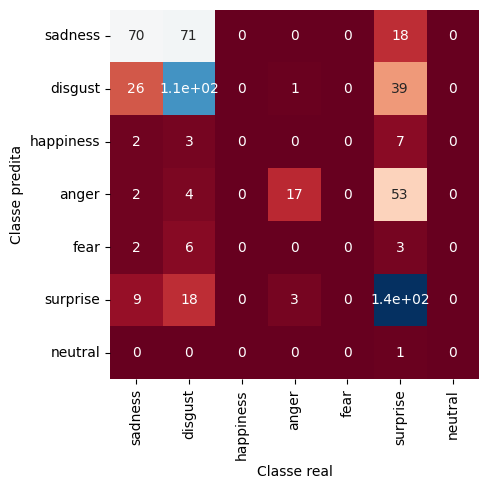

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_bownb, pred_bownb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb.unique(),
            yticklabels=catg_bownb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

#gerada a matriz de confusão que é uma tabela onde cada linha representa
#a instância real de uma classe e cada coluna representa a classe prevista.
#A diagonal principal da matriz contém os verdadeiros positivos para cada classe,
#enquanto as outras entradas indicam erros de classificação

In [ ]:
catg_bownb1= data_content['sentiment_polarity']

X_train_bownb1, X_test_bownb1, y_train_bownb1, y_test_bownb1 = train_test_split(
                                                                              txt_bownb,
                                                                              catg_bownb1,
                                                                              test_size=0.2)

naive_bayes_bownb1 = MultinomialNB()
naive_bayes_bownb1.fit(X_train_bownb1, y_train_bownb1)
pred_bownb1 = naive_bayes_bownb1.predict(X_test_bownb1)

print(classification_report(y_test_bownb1, pred_bownb1,zero_division=1))

              precision    recall  f1-score   support

    negative       0.80      0.82      0.81       334
     neutral       1.00      0.00      0.00        20
    positive       0.74      0.78      0.76       249

    accuracy                           0.78       603
   macro avg       0.85      0.53      0.52       603
weighted avg       0.78      0.78      0.76       603



In [ ]:
precision_dc1_1, recall_dc1_1, f1_1_dc1_1, support_dc1_1  =  precision_recall_fscore_support(
                                                                                              y_test_bownb1,
                                                                                              pred_bownb1,
                                                                                              average='macro',
                                                                                              zero_division=1)

print(f"Precision data content: {precision_dc1_1:.3f}")
print(f"Recall data content: {recall_dc1_1:.3f}")
print(f"F1_1-Score data content: {f1_1_dc1_1:.3f} ")

accuracy_dc1_1 = accuracy_score(y_test_bownb1, pred_bownb1)

print(f"Acurácia: {accuracy_dc1_1:.3f}" )

Precision data content: 0.848
Recall data content: 0.533
F1_1-Score data content: 0.524 
Acurácia: 0.776


# Agora o mesmo modelo BoW + Naive Bayes com os dados limpos e transformados

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_dc_limpo = CountVectorizer()

BoW_matriz_dc_limpo = vectorizer_dc_limpo.fit_transform(data_content2['content'])

bownb_matriz_df = pd.DataFrame(BoW_matriz_dc_limpo.toarray(),columns=vectorizer_dc_limpo.get_feature_names_out())
bownb_matriz_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
txt_bownb_dc2 = bownb_matriz_df
catg_bownb_dc2  = data_content2['sentiment_binary']

X_train_bownb_2, X_test_bownb_2, y_train_bownb_2, y_test_bownb_2 = train_test_split(
                                                                                    txt_bownb_dc2,
                                                                                    catg_bownb_dc2 ,
                                                                                    test_size=0.2)

naive_bayes2 = MultinomialNB()
naive_bayes2.fit(X_train_bownb_2, y_train_bownb_2)
pred_bownb_2 = naive_bayes2.predict(X_test_bownb_2)

print(classification_report(y_test_bownb_2, pred_bownb_2,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
          10       0.63      0.75      0.69       165
         100       0.00      0.00      0.00        19
        1000       0.86      0.39      0.54        64
       10000       1.00      0.00      0.00        10
      100000       0.57      0.69      0.62       200
     1000000       0.60      0.56      0.58       144

    accuracy                           0.61       603
   macro avg       0.67      0.34      0.35       603
weighted avg       0.62      0.61      0.59       603



In [ ]:
precision_bownb_2, recall_bownb_2, f1_bownb_2, support_bownb_2  =  precision_recall_fscore_support(
                                                                                                  y_test_bownb_2,
                                                                                                  pred_bownb_2,
                                                                                                  average='macro',
                                                                                                  zero_division=1)
print(f"Precision data content: {precision_dc:.3f}")
print(f"Recall data content: {recall_dc:.3f}")
print(f"F1-Score data content: {f1_dc:.3f} ")

accuracy_bownb_2 = accuracy_score(y_test_bownb_2, pred_bownb_2)

print(f"Acurácia: {accuracy_bownb_2:.3f}" )


Precision data content: 0.785
Recall data content: 0.301
F1-Score data content: 0.297 
Acurácia: 0.610


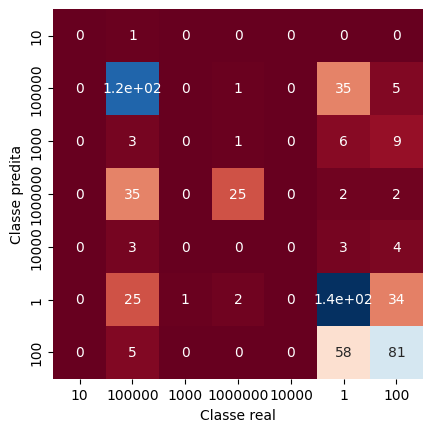

In [ ]:
cm = confusion_matrix(y_test_bownb_2, pred_bownb_2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb_dc2.unique(),
            yticklabels=catg_bownb_dc2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

#Diagonal Principal: Contém o número de predições corretas para cada classe.
#Fora da Diagonal: Contém o número de predições incorretas, onde a classe real foi confundida com outra.

In [ ]:
catg_bownb_3 = data_content2['sp_ordinal']

X_train_bownb_3 , X_test_bownb_3 , y_train_bownb_3 , y_test_bownb_3  = train_test_split(
                                                                                    txt_bownb_dc2,
                                                                                    catg_bownb_3,
                                                                                    test_size=0.2)

naive_bayes3 = MultinomialNB()
naive_bayes3.fit(X_train_bownb_3 , y_train_bownb_3 )
pred_bownb_3  = naive_bayes3.predict(X_test_bownb_3 )

print(classification_report(y_test_bownb_3 , pred_bownb_3, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       234
           1       1.00      0.00      0.00        13
           2       0.85      0.87      0.86       356

    accuracy                           0.82       603
   macro avg       0.88      0.55      0.55       603
weighted avg       0.82      0.82      0.81       603



In [ ]:
precision_bownb_3, recall_bownb_3, f1_bownb_3, support_bownb_3 = precision_recall_fscore_support(
                                                                                                y_test_bownb_3,
                                                                                                pred_bownb_3,
                                                                                                average='macro',
                                                                                                zero_division=1)
print(f"Precision data content: {precision_bownb_3:.3f}")
print(f"Recall data content: {recall_bownb_3:.3f}")
print(f"F1-Score data content: {f1_bownb_3:.3f} ")

accuracy_bownb_3 = accuracy_score(y_test_bownb_3 , pred_bownb_3)

print(f"Acurácia: {accuracy_bownb_3:.3f}" )

Precision data content: 0.876
Recall data content: 0.555
F1-Score data content: 0.549 
Acurácia: 0.821


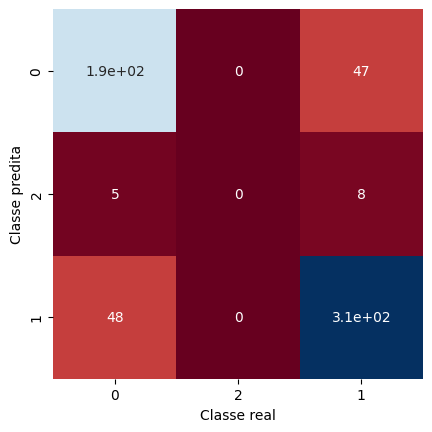

In [ ]:
cm = confusion_matrix(y_test_bownb_3 , pred_bownb_3)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb_3.unique(),
            yticklabels=catg_bownb_3.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

 # TF-IDF + Naive Bayes


---

Abaixo, utiliza-se o TfidfVectorizer para transformar um conjunto de textos em uma matriz de características TF-IDF. Esse modelo mede a importância de uma palavra em um documento em relação a um conjunto de documentos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

vectorizer_tfidf = tfidf.fit_transform(data_content2['content'])

tfidf_DataFrame = pd.DataFrame(vectorizer_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_DataFrame.head(20)

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
txtdf_tfidfnb = tfidf_DataFrame
categorias_tfidfnb = data_content2['sentiment_binary']

X_train_tfidfnb, X_test_tfidfnb, y_train_tfidfnb, y_test_tfidfnb = train_test_split(
                                                                                    txtdf_tfidfnb,
                                                                                    categorias_tfidfnb,
                                                                                    test_size=0.2)

naive_bayes_tfidfnb = MultinomialNB()
naive_bayes_tfidfnb.fit(X_train_tfidfnb, y_train_tfidfnb)
y_pred_tfidfnb = naive_bayes_tfidfnb.predict(X_test_tfidfnb)

print(classification_report(y_test_tfidfnb, y_pred_tfidfnb,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
          10       0.54      0.71      0.61       181
         100       1.00      0.00      0.00        14
        1000       1.00      0.02      0.03        63
       10000       1.00      0.00      0.00         5
      100000       0.50      0.78      0.61       197
     1000000       0.70      0.30      0.43       141

    accuracy                           0.54       603
   macro avg       0.82      0.26      0.24       603
weighted avg       0.63      0.54      0.49       603



In [ ]:
precision_tfidfnb, recalln_tfidfnb, f1n_tfidfnb, supportn_tfidfnb =  precision_recall_fscore_support(
                                                                                                    y_test_tfidfnb,
                                                                                                    y_pred_tfidfnb,
                                                                                                    average='macro',
                                                                                                    zero_division=1)
print(f"Precision data content: {precision_tfidfnb:.3f}")
print(f"Recall data content: {recalln_tfidfnb:.3f}")
print(f"F1-Score data content: {f1n_tfidfnb:.3f} ")

accuracy_tfidfnb = accuracy_score(y_test_tfidfnb, y_pred_tfidfnb)

print(f"Acurácia: {accuracy_tfidfnb:.3f}" )

Precision data content: 0.821
Recall data content: 0.258
F1-Score data content: 0.240 
Acurácia: 0.539


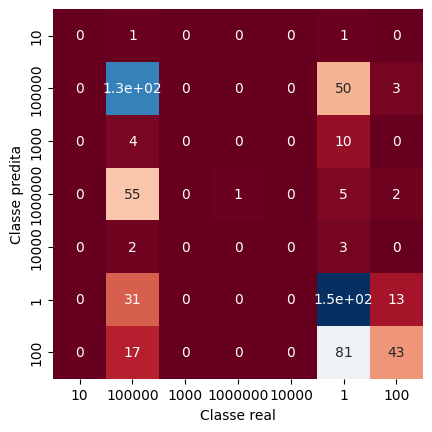

In [ ]:
cm = confusion_matrix(y_test_tfidfnb, y_pred_tfidfnb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias_tfidfnb.unique(),
            yticklabels=categorias_tfidfnb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [ ]:
categorias_tfidfnb2  = data_content2['sp_ordinal']

X_train_tfidfnb2 , X_test_tfidfnb2 , y_train_tfidfnb2 , y_test_tfidfnb2  = train_test_split(
                                                                                            txtdf_tfidfnb,
                                                                                            categorias_tfidfnb2,
                                                                                            test_size=0.2 )

naive_bayes_tfidfnb2  = MultinomialNB()
model_tfidfnb2  = naive_bayes_tfidfnb2 .fit(X_train_tfidfnb2 , y_train_tfidfnb2 )

y_pred_tfidfnb2  = model_tfidfnb2 .predict(X_test_tfidfnb2)

print(classification_report(y_test_tfidfnb, y_pred_tfidfnb,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
          10       0.54      0.71      0.61       181
         100       1.00      0.00      0.00        14
        1000       1.00      0.02      0.03        63
       10000       1.00      0.00      0.00         5
      100000       0.50      0.78      0.61       197
     1000000       0.70      0.30      0.43       141

    accuracy                           0.54       603
   macro avg       0.82      0.26      0.24       603
weighted avg       0.63      0.54      0.49       603



In [ ]:
precision_tfidfnb2, recall_tfidfnb2, f1_tfidfnb2, support_tfidfnb2 =  precision_recall_fscore_support(
                                                                                                    y_test_tfidfnb2,
                                                                                                    y_pred_tfidfnb2,
                                                                                                    average='macro',
                                                                                                    zero_division=1)
print(f"Precision data content: {precision_tfidfnb2:.3f}")
print(f"Recall data content: {recall_tfidfnb2:.3f}")
print(f"F1-Score data content: {f1_tfidfnb2:.3f} ")

accuracy_tfidfnb2 = accuracy_score(y_test_tfidfnb2, y_pred_tfidfnb2)

print(f"Acurácia: {accuracy_tfidfnb2:.3f}" )


Precision data content: 0.873
Recall data content: 0.507
F1-Score data content: 0.506 
Acurácia: 0.769


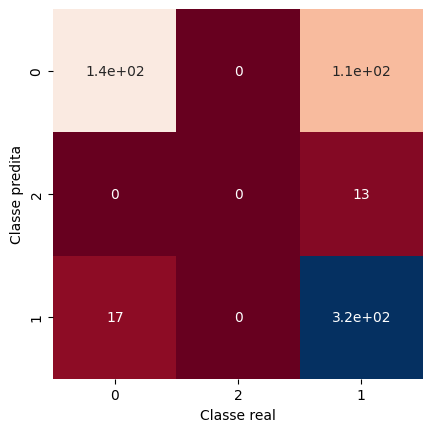

In [ ]:
cm = confusion_matrix(y_test_tfidfnb2, y_pred_tfidfnb2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categorias_tfidfnb2.unique(),
            yticklabels= categorias_tfidfnb2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---
# BoW + KNN


---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bow_knn = CountVectorizer()

vectorizer_bowknn = bow_knn.fit_transform(data_content2['content'])

BOWKNN_dataframe=pd.DataFrame(vectorizer_bowknn.toarray(),columns=bow_knn.get_feature_names_out())
BOWKNN_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
txt_bowknn = BOWKNN_dataframe
categorias_bowknn = data_content2['sentiment_binary']

X_train_bowknn, X_test_bowknn, y_train_bowknn, y_test_bowknn = train_test_split(txt_bowknn, categorias_bowknn, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bowknn, y_train_bowknn)
y_pred_bowknn  = knn.predict(X_test_bowknn)

print(classification_report(y_test_bowknn , y_pred_bowknn, zero_division=1))


              precision    recall  f1-score   support

          10       0.54      0.08      0.14       178
         100       0.05      0.19      0.08        21
        1000       0.15      0.54      0.23        67
       10000       1.00      0.00      0.00         5
      100000       0.48      0.10      0.17       198
     1000000       0.37      0.61      0.46       134

    accuracy                           0.26       603
   macro avg       0.43      0.25      0.18       603
weighted avg       0.42      0.26      0.23       603



In [ ]:
precision_bwknn, recall_bwknn, f1_bwknn, support_bwknn =  precision_recall_fscore_support(
                                                                                        y_test_bowknn,
                                                                                        y_pred_bowknn,
                                                                                        average='macro',
                                                                                        zero_division=1)
print(f"Precision data content: {precision_bwknn:.3f}")
print(f"Recall data content: {recall_bwknn:.3f}")
print(f"F1-Score data content: {f1_bwknn:.3f} ")

accuracy_bwknn = accuracy_score(y_test_bowknn, y_pred_bowknn)

print(f"Acurácia: {accuracy_bwknn:.3f}" )

Precision data content: 0.432
Recall data content: 0.253
F1-Score data content: 0.181 
Acurácia: 0.259


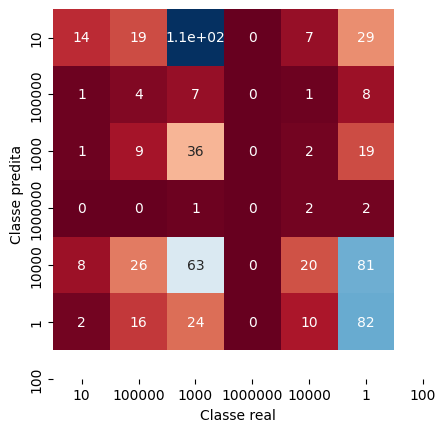

In [ ]:
cm = confusion_matrix(y_test_bowknn, y_pred_bowknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categorias_bowknn.unique(),
            yticklabels= categorias_bowknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [ ]:
categorias_bowknn2 = data_content2['sp_ordinal']

X_train_bowknn2, X_test_bowknn2, y_train_bowknn2, y_test_bowknn2 = train_test_split(
                                                                                    txt_bowknn,
                                                                                    categorias_bowknn2,
                                                                                    test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bowknn2, y_train_bowknn2)
y_pred_bowknn2  = knn.predict(X_test_bowknn2)

print(classification_report(y_test_bowknn2 , y_pred_bowknn2, zero_division=1))

              precision    recall  f1-score   support

           0       0.68      0.48      0.57       248
           1       0.09      0.27      0.13        15
           2       0.69      0.77      0.73       340

    accuracy                           0.64       603
   macro avg       0.49      0.51      0.47       603
weighted avg       0.67      0.64      0.65       603



In [ ]:
precision_bwknn2, recall_bwknn2, f1_bwknn2, support_bwknn2 =  precision_recall_fscore_support(
                                                                                            y_test_bowknn2,
                                                                                            y_pred_bowknn2,
                                                                                            average='macro',
                                                                                            zero_division=1)
print(f"Precision data content: {precision_bwknn2:.3f}")
print(f"Recall data content: {recall_bwknn2:.3f}")
print(f"F1-Score data content: {f1_bwknn2:.3f} ")

accuracy_bwknn2 = accuracy_score(y_test_bowknn2, y_pred_bowknn2)

print(f"Acurácia: {accuracy_bwknn2:.3f}" )

Precision data content: 0.485
Recall data content: 0.507
F1-Score data content: 0.475 
Acurácia: 0.640


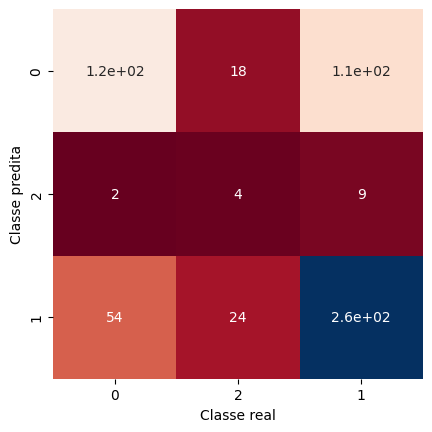

In [ ]:
cm = confusion_matrix(y_test_bowknn2, y_pred_bowknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categorias_bowknn2.unique(),
            yticklabels= categorias_bowknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

# TF-IDF + KNN

---



In [ ]:
tfidf_knn = TfidfVectorizer()

vectorizer_tfidf_knn = tfidf_knn.fit_transform(data_content2['content'])

tfidf_knn_dataframe = pd.DataFrame(vectorizer_tfidf_knn.toarray(), columns=tfidf_knn.get_feature_names_out())
tfidf_knn_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
coment_tfidfknn = tfidf_knn_dataframe
categorias_tfidfknn = data_content2['sentiment_binary']

X_train_tfidfknn, X_test_tfidfknn, y_train_tfidfknn, y_test_tfidfknn = train_test_split(
                                                                                      coment_tfidfknn,
                                                                                      categorias_tfidfknn,
                                                                                      test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidfknn, y_train_tfidfknn)
y_pred_tfidfknn  = knn.predict(X_test_tfidfknn)

print(classification_report(y_test_tfidfknn , y_pred_tfidfknn, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
          10       0.48      0.52      0.50       171
         100       0.17      0.06      0.08        18
        1000       0.60      0.40      0.48        70
       10000       1.00      0.00      0.00        14
      100000       0.41      0.69      0.52       176
     1000000       0.56      0.26      0.36       152

    accuracy                           0.46       603
   macro avg       0.60      0.28      0.28       603
weighted avg       0.50      0.46      0.44       603



In [ ]:
precision_tfidfknn, recall_tfidfknn, f1_tfidfknn, support_tfidfknn =  precision_recall_fscore_support(
                                                                                                  y_test_tfidfknn,
                                                                                                  y_pred_tfidfknn,
                                                                                                  average='macro',
                                                                                                  zero_division=1)
print(f"Precision data content: {precision_tfidfknn:.3f}")
print(f"Recall data content: {recall_tfidfknn:.3f}")
print(f"F1-Score data content: {f1_tfidfknn:.3f} ")

accuracy_tfidfknn = accuracy_score(y_test_tfidfknn, y_pred_tfidfknn)

print(f"Acurácia: {accuracy_tfidfknn:.3f}" )

Precision data content: 0.603
Recall data content: 0.276
F1-Score data content: 0.277 
Acurácia: 0.464


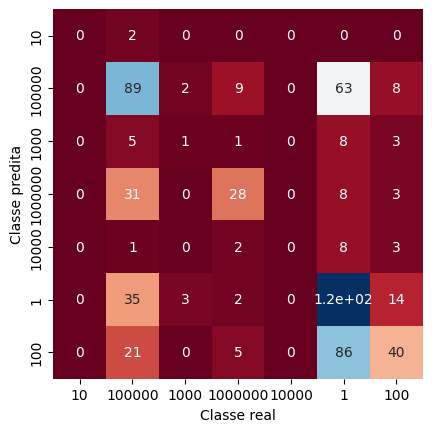

In [ ]:
cm = confusion_matrix(y_test_tfidfknn, y_pred_tfidfknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categorias_tfidfknn.unique(),
            yticklabels= categorias_tfidfknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [ ]:
categorias_tfidfknn2 = data_content2['sp_ordinal']

X_train_tfidfknn2, X_test_tfidfknn2, y_train_tfidfknn2, y_test_tfidfknn2 = train_test_split(coment_tfidfknn,
                                                                                            categorias_tfidfknn2,
                                                                                            test_size=0.2)

knn.fit(X_train_tfidfknn2, y_train_tfidfknn2)

y_pred_tfidfknn2  = knn.predict(X_test_tfidfknn2)

print(classification_report(y_test_tfidfknn2 , y_pred_tfidfknn2, zero_division=1))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       236
           1       0.00      0.00      0.00        13
           2       0.77      0.86      0.81       354

    accuracy                           0.75       603
   macro avg       0.50      0.50      0.50       603
weighted avg       0.74      0.75      0.74       603



In [ ]:
precision_tfidfknn2, recall_tfidfknn2, f1_tfidfknn2, support_tfidfknn2 = precision_recall_fscore_support(
                                                                                                        y_test_tfidfknn2,
                                                                                                        y_pred_tfidfknn2,
                                                                                                        average='macro',
                                                                                                        zero_division=1)
print(f"Precision data content: {precision_tfidfknn2:.3f}")
print(f"Recall data content: {recall_tfidfknn2:.3f}")
print(f"F1-Score data content: {f1_tfidfknn2:.3f} ")

accuracy_tfidfknn2= accuracy_score(y_test_tfidfknn2, y_pred_tfidfknn2)

print(f"Acurácia: {accuracy_tfidfknn2:.3f}" )

Precision data content: 0.499
Recall data content: 0.497
F1-Score data content: 0.496 
Acurácia: 0.751


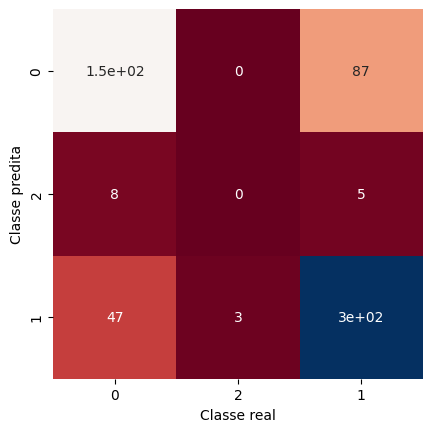

In [ ]:
cm = confusion_matrix(y_test_tfidfknn2, y_pred_tfidfknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categorias_tfidfknn2.unique(),
            yticklabels= categorias_tfidfknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

#Rede neural com embedding

---


**O que são Embeddings?**

Embeddings são representações densas de palavras ou documentos em um espaço vetorial de baixa dimensionalidade.
Eles capturam relações semânticas entre palavras, permitindo que palavras semelhantes fiquem próximas no espaço vetorial.



1.   Word2Vec:

Word2Vec é uma técnica baseada em redes neurais para aprender representações de palavras.

Existem duas arquiteturas principais: Continuous Bag of Words (CBOW) e Skip-gram.

**CBOW:** Prediz uma palavra com base no contexto das palavras vizinhas.

**Skip-gram:** Prediz as palavras de contexto dado uma palavra central.

Word2Vec é treinado em grandes volumes de texto e gera embeddings que capturam semântica de maneira eficaz.

2.  **GloVe (Global Vectors for Word Representation)**

Técnica baseada em fatoração de matriz que aprende embeddings a partir da co-ocorrência global de palavras em um corpus.
Diferentemente do Word2Vec, que é baseado em janelas de contexto locais, GloVe utiliza a matriz de co-ocorrência global para aprender as representações das palavras.

GloVe é conhecido por gerar embeddings de alta qualidade que capturam relações semânticas e sintáticas.

3. **Doc2Vec**

É uma extensão do Word2Vec que aprende representações vetoriais para documentos inteiros, além de palavras.

Existem duas variantes principais:

**Distributed Memory (DM):** Funciona de maneira similar ao CBOW, mas adiciona um vetor de documento ao contexto.

**Distributed Bag of Words (DBOW):** Funciona de maneira similar ao Skip-gram, mas treina um vetor de documento para predizer palavras no documento.

Doc2Vec é útil quando precisamos de embeddings para documentos, não apenas palavras.






---


#Escolhido: Word2Vec

---


Pois é ideal para capturar o significado das palavras com base no contexto imediato, o que é crucial para entender a linguagem coloquial e as nuances dos comentários dos usuários. E, além de que, pode identificar relações entre palavras, o que ajuda a detectar sentimentos e emoções subjacentes em comentários de usuários.

In [ ]:
from nltk.tokenize import word_tokenize

# Pré-processamento e tokenização
data_content2['tokens'] = data_content2['content'].apply(lambda x: word_tokenize(x.lower()))
data_content2

,reviewId,app_name,content,sp_ordinal,sentiment_binary,tokens
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,0,10,"[app, shopee, razoável, apesar, fácil, utiliza..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,0,10,"[app, bem, otimizado, fácil, visualizar, produ..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,0,10,"[app, bom, prático, fácil, entender, porém, al..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,0,10,"[aplicativo, bom, algo, chateou, bastante, fat..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,2,100000,"[app, bom, porém, tido, dificuldades, pagament..."
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,2,100000,"[funciona, reconhimento, facial, diz, nenhum, ..."
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,2,100000,"[experiência, app, sendo, boa, precisa, aprimo..."
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,2,100000,"[consigo, logar, jeito, nenhum, código, valida..."
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,2,100000,"[funcionava, ultima, atualização, algum, motiv..."


Explicando os parâmetros de Word2Vec:
 - Pode ser treinado de duas maneiras: CBOW e SKIP-GRAM
    - **CBOW (continuous bag-of-words ):**  é uma rede neural que prediz a palavra dado um contexto, sendo o contexto interpretado como uma sentença. Este modelo pode prever tanto palavras prévias como posteriores em um contexto.
    - **Skip-Gram:** desempenha uma função inversa do apresentado em CBOW, ou seja, dado uma palavra prediz calculando as palavras mais prováveis ao contexto.

*  **sg:** é 1 para o skip-gram e 0 caso utilizar o CBOW

*  **window:** que vai determinar quantas palavras ele vai considerar antes e quantas palavras ele vai considerar depois.

* **size:** tamanho do vetor.

* **min-count:** Define o limite mínimo de frequência das palavras. Palavras que ocorrem com menos frequência que min_count serão ignoradas.

* **alpha:**Taxa de aprendizado inicial. A taxa de aprendizado diminui linearmente durante o treinamento.

* **min-alpha:**  é a taxa de aprendizado mínima, quando aplicado a decaimento de alpha.

In [ ]:
from gensim.models import Word2Vec

# Treinar o modelo Word2Vec utilizando CBOW
model_w2v = Word2Vec(sentences = data_content2['tokens'], sg=0, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

#Construção do vocabulário
model_w2v.build_vocab(data_content2['tokens'], update=True)
model_w2v.train(data_content2['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=30)
model_w2v.wv.save_word2vec_format('model_w2v.txt', binary=False)



In [604]:
from gensim.models import KeyedVectors

# Load the word vectors from the text file
model = model_w2v.wv.load_word2vec_format('model_w2v.txt', binary=False)

word_vector = model['bom'] # Access word vectors directly
print(word_vector)

[-0.2085719  -0.310248   -0.1700035  -0.20654303  0.41392952 -0.08188316
  0.22478305  0.66818196  0.3999854  -0.14822932  1.072788   -0.27669838
 -0.0590803   0.510131    0.24937196 -0.0035914   0.6807143  -0.83004105
  0.4410152  -0.14240076  0.393443    0.05392944  0.06536328 -0.5678688
 -0.14619325  0.41949674 -0.16415782  0.3394376  -0.18464042 -0.01632662
  0.8288602  -0.117895    0.4732862   0.02715611 -0.46082234  0.36582386
  0.26702997 -0.47631666  0.62076527  0.34430066  0.09487889  0.19765
 -0.37302864 -0.11875532 -0.22056866 -0.3213912   0.45879152  0.40935582
  0.6189611   0.38870507  0.92259353  0.3162356  -0.8825371   1.0895772
 -0.18259452  0.5113582  -0.21345046 -0.13369498  0.1559991  -0.03773444
 -0.19347996  0.05962802  0.04070877 -0.23921496  0.00681215  0.13048382
 -0.16766787 -0.5534613  -0.06388399  0.17912559  0.49586484  0.7660227
 -0.3236478  -0.4287153  -0.4139678  -0.60361135  0.0206858  -0.03487889
  0.17677839 -0.03965379  0.5330407   0.00999247 -0.19997

In [605]:
model.most_similar('bom')

[('ótimo', 0.7107666730880737),
 ('maravilhoso', 0.5562750697135925),
 ('perfeito', 0.5463969707489014),
 ('otimo', 0.5261083841323853),
 ('virar', 0.5186097025871277),
 ('legal', 0.504880964756012),
 ('excelente', 0.48007601499557495),
 ('completo', 0.46628737449645996),
 ('amo', 0.4647415578365326),
 ('si', 0.45653048157691956)]

In [606]:
model.most_similar('ruim')

[('horrível', 0.49394965171813965),
 ('difícil', 0.46734708547592163),
 ('mudando', 0.42995718121528625),
 ('complicado', 0.4104636609554291),
 ('antigo', 0.4065593183040619),
 ('gravando', 0.4013015627861023),
 ('falando', 0.3884778320789337),
 ('atualiza', 0.3804062008857727),
 ('pensa', 0.3795754015445709),
 ('lá', 0.3708041310310364)]

In [607]:
import numpy as np

tokens = data_content2['tokens']

def get_comment_embedding(tokens, model_w2v ):
    valid_words = [word for word in tokens if word in model]
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)
    else:
        return np.zeros(300)

data_content2['embedding_cbow'] = data_content2['tokens'].apply(lambda x: get_comment_embedding(x, model_w2v ))
data_content2.loc[0, 'embedding_cbow']

array([ 1.68468073e-01,  1.68255627e-01, -1.83547884e-01,  3.15214396e-01,
       -1.05153039e-01, -2.34724388e-01,  1.38089545e-02,  1.17992513e-01,
        1.71780139e-01,  1.12952232e-01,  1.43835559e-01, -3.47345471e-02,
        2.15538278e-01,  1.59256570e-02, -1.13971561e-01,  5.29142916e-02,
        2.35780120e-01, -5.14774993e-02,  8.73926952e-02, -5.46554327e-02,
       -4.42397930e-02,  6.02948219e-02,  4.99100871e-02, -1.16161145e-01,
        2.43428618e-01, -1.52003229e-01, -1.06149763e-01,  7.66350105e-02,
       -2.72965163e-01, -7.46332407e-02,  8.87446404e-02,  7.87206460e-03,
       -2.34419666e-02, -1.62063763e-02,  5.93941547e-02,  3.18455808e-02,
        3.09141446e-02,  3.39515864e-05,  2.77227201e-02, -1.00022092e-01,
        2.80266833e-02,  1.19942799e-02, -7.12227076e-02,  1.74392298e-01,
        1.13672882e-01,  1.51589125e-01,  1.82453081e-01, -8.65139142e-02,
       -1.34701565e-01, -3.76227312e-02, -1.07001744e-01,  1.72834322e-01,
       -1.49058387e-01, -

In [608]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = np.vstack(data_content2['embedding_cbow'].values)
y = data_content2['sentiment_binary']

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(
                                                                                        X,
                                                                                        y,
                                                                                        test_size=0.2,
                                                                                        random_state=123)
# Lista de classificadores para testar
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

# DataFrame para armazenar os resultados
results = []

# Testar cada classificador
for name, clf in classifiers.items():
    clf.fit(X_train_word2vec, y_train_word2vec)
    y_pred = clf.predict(X_test_word2vec)
    precision_word2vec, recall_word2vec, f1_word2vec, support_word2vec=  precision_recall_fscore_support(
                                                                                                  y_test_word2vec,
                                                                                                  y_pred,
                                                                                                  average='macro',
                                                                                                  zero_division=1)

    accuracy = accuracy_score(y_test_word2vec, y_pred)

    # Armazenar os resultados no DataFrame
    result = {
        "Classifier": name,
        "Precision": f"{precision_word2vec:.3f}",
        "Recall": f"{recall_word2vec:.3f}",
        "F1-Score": f"{f1_word2vec:.3f}",
        "Accuracy": f"{accuracy:.3f}"
    }
    results.append(result)
    print(f"Precision: {precision_word2vec:.3f}")
    print(f"Recall: {recall_word2vec:.3f}")
    print(f"F1-Score: {f1_word2vec:.3f} ")
    print(f"{name} Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test_word2vec, y_pred,zero_division=1))

# Escolher o melhor classificador com base na acurácia ou outras métricas
best_classifier = max(classifiers, key=lambda name: classifiers[name].score(X_test_word2vec, y_test_word2vec))
print(f"Best Classifier: {best_classifier}\n")

# Mostrar os resultados em formato de tabela
results

Precision: 0.705
Recall: 0.374
F1-Score: 0.384 
Logistic Regression Accuracy: 0.6136

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
          10       0.63      0.70      0.66       171
         100       0.50      0.17      0.25        18
        1000       0.58      0.49      0.53        51
       10000       1.00      0.00      0.00        14
      100000       0.60      0.70      0.65       192
     1000000       0.62      0.57      0.59       156

    accuracy                           0.61       603
   macro avg       0.71      0.37      0.38       603
weighted avg       0.62      0.61      0.60       603

Precision: 0.681
Recall: 0.372
F1-Score: 0.377 
SVM Accuracy: 0.6020

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
          10       0.64      0.68      0.66       171
         100       0.38      0.17      0.23        18
        1000       0.56      0

[{'Classifier': 'Logistic Regression',
  'Precision': '0.705',
  'Recall': '0.374',
  'F1-Score': '0.384',
  'Accuracy': '0.614'},
 {'Classifier': 'SVM',
  'Precision': '0.681',
  'Recall': '0.372',
  'F1-Score': '0.377',
  'Accuracy': '0.602'},
 {'Classifier': 'KNN',
  'Precision': '0.584',
  'Recall': '0.290',
  'F1-Score': '0.287',
  'Accuracy': '0.524'},
 {'Classifier': 'Gaussian - Naive Bayes',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.439'}]

In [609]:
X1 = np.vstack(data_content2['embedding_cbow'].values)
y1 = data_content2['sp_ordinal']  # Assumindo que 'sentiment' é a coluna alvo

X_train_word2vec1, X_test_word2vec1, y_train_word2vec1, y_test_word2vec1 = train_test_split(
                                                                                        X1,
                                                                                        y1,
                                                                                        test_size=0.2,
                                                                                        random_state=123)
# Lista de classificadores para testar
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

# DataFrame para armazenar os resultados
results1 = []

# Testar cada classificador
for name, clf in classifiers.items():
    clf.fit(X_train_word2vec1, y_train_word2vec1)
    y_pred1 = clf.predict(X_test_word2vec1)
    precision_word2vec1, recall_word2vec1, f1_word2vec1, support_word2vec1=  precision_recall_fscore_support(
                                                                                                  y_test_word2vec,
                                                                                                  y_pred,
                                                                                                  average='macro',
                                                                                                  zero_division=1)

    accuracy1 = accuracy_score(y_test_word2vec1, y_pred1)

    # Armazenar os resultados no DataFrame
    result1 = {
        "Classifier": name,
        "Precision": f"{precision_word2vec1:.3f}",
        "Recall": f"{recall_word2vec1:.3f}",
        "F1-Score": f"{f1_word2vec1:.3f}",
        "Accuracy": f"{accuracy1:.3f}"
    }
    results1.append(result1)
    print(f"Precision: {precision_word2vec1:.3f}")
    print(f"Recall: {recall_word2vec1:.3f}")
    print(f"F1-Score: {f1_word2vec1:.3f} ")
    print(f"{name} Accuracy: {accuracy1:.4f}\n")
    print(classification_report(y_test_word2vec1, y_pred1 ,zero_division=1))

# Escolher o melhor classificador com base na acurácia ou outras métricas
best_classifier = max(classifiers, key=lambda name: classifiers[name].score(X_test_word2vec, y_test_word2vec))
print(f"Best Classifier: {best_classifier}\n")

# Mostrar os resultados em formato de tabela
results1


Precision: 0.476
Recall: 0.342
F1-Score: 0.302 
Logistic Regression Accuracy: 0.8308

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       223
           1       0.40      0.11      0.17        18
           2       0.85      0.90      0.87       362

    accuracy                           0.83       603
   macro avg       0.69      0.60      0.61       603
weighted avg       0.82      0.83      0.82       603

Precision: 0.476
Recall: 0.342
F1-Score: 0.302 
SVM Accuracy: 0.8342

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       223
           1       0.25      0.06      0.09        18
           2       0.85      0.90      0.87       362

    accuracy                           0.83       603
   macro avg       0.64      0.58      0.59       603
weighted avg       0.82      0.83      0.82       603

Precision: 0.476
Recall: 0.342
F1-Score: 0.302 
KNN Accuracy: 0.7910

            

[{'Classifier': 'Logistic Regression',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.831'},
 {'Classifier': 'SVM',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.834'},
 {'Classifier': 'KNN',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.791'},
 {'Classifier': 'Gaussian - Naive Bayes',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.721'}]

In [613]:
# Treinar o modelo Word2Vec utilizando skip-gram
model_w2v_sg = Word2Vec(sentences = data_content2['tokens'], sg=1, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

#Construção do vocabulário
model_w2v_sg.build_vocab(data_content2['tokens'], update=True)
model_w2v_sg.train(data_content2['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=30)
model_w2v.wv.save_word2vec_format('model_w2v_sg.txt', binary=False)

In [614]:
model_w2v_sg.wv.most_similar('bom')

[('ótimas', 0.35745468735694885),
 ('bons', 0.3450253903865814),
 ('ótimo', 0.3443809747695923),
 ('pega', 0.33974596858024597),
 ('incomodando', 0.33320140838623047),
 ('apresentações', 0.32714682817459106),
 ('rapido', 0.32338935136795044),
 ('bonitos', 0.319576233625412),
 ('virar', 0.31871384382247925),
 ('motion', 0.31795498728752136)]

In [615]:
model_w2v_sg.wv.most_similar('ruim')

[('gravando', 0.32412463426589966),
 ('limpando', 0.3127168118953705),
 ('ficou', 0.30294734239578247),
 ('lixo', 0.28975212574005127),
 ('rodando', 0.2864075303077698),
 ('achando', 0.2853594720363617),
 ('ar', 0.28430256247520447),
 ('infinito', 0.2823340594768524),
 ('gera', 0.2822365164756775),
 ('solicita', 0.2817886173725128)]

In [617]:
data_content2['embedding_sg'] = data_content2['tokens'].apply(lambda x: get_comment_embedding(x, model_w2v ))
data_content2.loc[0, 'embedding_sg']

X_sg = np.vstack(data_content2['embedding_sg'].values)
y_sg = data_content2['sentiment_binary']  # Assumindo que 'sentiment' é a coluna alvo

X_train_word2vec_sg, X_test_word2vec_sg, y_train_word2vec_sg, y_test_word2vec_sg = train_test_split(
                                                                                        X_sg,
                                                                                        y_sg,
                                                                                        test_size=0.2,
                                                                                        random_state=123)
# Lista de classificadores para testar
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

# DataFrame para armazenar os resultados
results_sg = []

# Testar cada classificador
for name, clf in classifiers.items():
    clf.fit(X_train_word2vec_sg, y_train_word2vec_sg)
    y_pred_sg = clf.predict(X_test_word2vec_sg)
    precision_word2vec_sg, recall_word2vec_sg, f1_word2vec_sg, support_word2vec_sg=  precision_recall_fscore_support(
                                                                                                  y_test_word2vec_sg,
                                                                                                  y_pred_sg,
                                                                                                  average='macro',
                                                                                                  zero_division=1)

    accuracy_sg = accuracy_score(y_test_word2vec_sg, y_pred_sg)

    # Armazenar os resultados no DataFrame
    result_sg = {
        "Classifier": name,
        "Precision": f"{precision_word2vec_sg:.3f}",
        "Recall": f"{recall_word2vec_sg:.3f}",
        "F1-Score": f"{f1_word2vec_sg:.3f}",
        "Accuracy": f"{accuracy_sg:.3f}"
    }
    results_sg.append(result_sg)
    print(f"Precision: {precision_word2vec_sg:.3f}")
    print(f"Recall: {recall_word2vec_sg:.3f}")
    print(f"F1-Score: {f1_word2vec_sg:.3f} ")
    print(f"{name} Accuracy: {accuracy_sg:.4f}\n")
    print(classification_report(y_test_word2vec_sg, y_pred_sg ,zero_division=1))

# Escolher o melhor classificador com base na acurácia ou outras métricas
best_classifier = max(classifiers, key=lambda name: classifiers[name].score(X_test_word2vec_sg, y_test_word2vec_sg))
print(f"Best Classifier: {best_classifier}\n")

# Mostrar os resultados em formato de tabela
results_sg


Precision: 0.705
Recall: 0.374
F1-Score: 0.384 
Logistic Regression Accuracy: 0.6136

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
          10       0.63      0.70      0.66       171
         100       0.50      0.17      0.25        18
        1000       0.58      0.49      0.53        51
       10000       1.00      0.00      0.00        14
      100000       0.60      0.70      0.65       192
     1000000       0.62      0.57      0.59       156

    accuracy                           0.61       603
   macro avg       0.71      0.37      0.38       603
weighted avg       0.62      0.61      0.60       603

Precision: 0.681
Recall: 0.372
F1-Score: 0.377 
SVM Accuracy: 0.6020

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
          10       0.64      0.68      0.66       171
         100       0.38      0.17      0.23        18
        1000       0.56      0

[{'Classifier': 'Logistic Regression',
  'Precision': '0.705',
  'Recall': '0.374',
  'F1-Score': '0.384',
  'Accuracy': '0.614'},
 {'Classifier': 'SVM',
  'Precision': '0.681',
  'Recall': '0.372',
  'F1-Score': '0.377',
  'Accuracy': '0.602'},
 {'Classifier': 'KNN',
  'Precision': '0.584',
  'Recall': '0.290',
  'F1-Score': '0.287',
  'Accuracy': '0.524'},
 {'Classifier': 'Gaussian - Naive Bayes',
  'Precision': '0.476',
  'Recall': '0.342',
  'F1-Score': '0.302',
  'Accuracy': '0.439'}]

In [618]:
X_sg1 = np.vstack(data_content2['embedding_sg'].values)
y_sg1 = data_content2['sp_ordinal']  # Assumindo que 'sentiment' é a coluna alvo

X_train_word2vec_sg1, X_test_word2vec_sg1, y_train_word2vec_sg1, y_test_word2vec_sg1 = train_test_split(
                                                                                        X_sg1,
                                                                                        y_sg1,
                                                                                        test_size=0.2,
                                                                                        random_state=123)
# Lista de classificadores para testar
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

# DataFrame para armazenar os resultados
results_sg1 = []

# Testar cada classificador
for name, clf in classifiers.items():
    clf.fit(X_train_word2vec_sg1, y_train_word2vec_sg1)
    y_pred_sg1 = clf.predict(X_test_word2vec_sg1)
    precision_word2vec_sg1, recall_word2vec_sg1, f1_word2vec_sg1, support_word2vec_sg1=  precision_recall_fscore_support(
                                                                                                  y_test_word2vec_sg1,
                                                                                                  y_pred_sg1,
                                                                                                  average='macro',
                                                                                                  zero_division=1)

    accuracy_sg1 = accuracy_score(y_test_word2vec_sg1, y_pred_sg1)

    # Armazenar os resultados no DataFrame
    result_sg1 = {
        "Classifier": name,
        "Precision": f"{precision_word2vec_sg1:.3f}",
        "Recall": f"{recall_word2vec_sg1:.3f}",
        "F1-Score": f"{f1_word2vec_sg1:.3f}",
        "Accuracy": f"{accuracy_sg1:.3f}"
    }
    results_sg1.append(result_sg1)
    print(f"Precision: {precision_word2vec_sg1:.3f}")
    print(f"Recall: {recall_word2vec_sg1:.3f}")
    print(f"F1-Score: {f1_word2vec_sg1:.3f} ")
    print(f"{name} Accuracy: {accuracy_sg1:.4f}\n")
    print(classification_report(y_test_word2vec_sg1, y_pred_sg1 ,zero_division=1))

# Escolher o melhor classificador com base na acurácia ou outras métricas
best_classifier = max(classifiers, key=lambda name: classifiers[name].score(X_test_word2vec_sg1, y_test_word2vec_sg1))
print(f"Best Classifier: {best_classifier}\n")

# Mostrar os resultados em formato de tabela
results_sg1


Precision: 0.685
Recall: 0.597
F1-Score: 0.614 
Logistic Regression Accuracy: 0.8308

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       223
           1       0.40      0.11      0.17        18
           2       0.85      0.90      0.87       362

    accuracy                           0.83       603
   macro avg       0.69      0.60      0.61       603
weighted avg       0.82      0.83      0.82       603

Precision: 0.638
Recall: 0.583
F1-Score: 0.590 
SVM Accuracy: 0.8342

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       223
           1       0.25      0.06      0.09        18
           2       0.85      0.90      0.87       362

    accuracy                           0.83       603
   macro avg       0.64      0.58      0.59       603
weighted avg       0.82      0.83      0.82       603

Precision: 0.521
Recall: 0.535
F1-Score: 0.528 
KNN Accuracy: 0.7910

            

[{'Classifier': 'Logistic Regression',
  'Precision': '0.685',
  'Recall': '0.597',
  'F1-Score': '0.614',
  'Accuracy': '0.831'},
 {'Classifier': 'SVM',
  'Precision': '0.638',
  'Recall': '0.583',
  'F1-Score': '0.590',
  'Accuracy': '0.834'},
 {'Classifier': 'KNN',
  'Precision': '0.521',
  'Recall': '0.535',
  'F1-Score': '0.528',
  'Accuracy': '0.791'},
 {'Classifier': 'Gaussian - Naive Bayes',
  'Precision': '0.561',
  'Recall': '0.626',
  'F1-Score': '0.564',
  'Accuracy': '0.721'}]

---
#BERTimbau

---

---
#LLAMA
---

---
#Análise dos resultados obtidos
---

In [ ]:
from prettytable import PrettyTable

# Criando uma tabela
table = PrettyTable()
table.field_names = ["Sentiment_binary", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR", "Word2Vec-SG - LR"]

# Adicionando linhas à tabela
table.add_row(["Precision", f"{precision_bownb_2:.3f}", f"{precision_tfidfnb:.3f}", f"{precision_bwknn:.3f}", f"{precision_tfidfknn:.3f}",results[0]['Precision'],  results_sg[0]['Precision']])
table.add_row(["Recall",    f"{recall_bownb_2:.3f}",    f"{recalln_tfidfnb:.3f}",   f"{recall_bwknn:.3f}",    f"{recall_tfidfknn:.3f}",   results[0]['Recall'],     results_sg[0]['Recall']])
table.add_row(["F1-score",  f"{f1_bownb_2:.3f}",        f"{f1n_tfidfnb:.3f}",       f"{f1_bwknn:.3f}",        f"{f1_tfidfknn:.3f}",       results[0]['F1-Score'],   results_sg[0]['F1-Score']])
table.add_row(["Accuracy",  f"{accuracy_bownb_2:.3f}",  f"{accuracy_tfidfnb:.3f}",  f"{accuracy_bwknn:.3f}",  f"{accuracy_tfidfknn:.3f}", results[0]['Accuracy'],   results_sg[0]['Accuracy']])

print(table)
print()

# Criando uma tabela
table2 = PrettyTable()
table2.field_names = ["sp_ordinal", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR ", "Word2Vec-SG - LR"]

# Adicionando linhas à tabela
table2.add_row(["Precision",  f"{precision_bownb_3:.3f}",   f"{precision_tfidfnb2:.3f}",  f"{precision_bwknn2:.3f}",  f"{precision_tfidfknn2:.3f}", results1[0]['Precision'],  results_sg1[0]['Precision']])
table2.add_row(["Recall",     f"{recall_bownb_3:.3f}",      f"{recall_tfidfnb2:.3f}",     f"{recall_bwknn2:.3f}",     f"{recall_tfidfknn2:.3f}",    results1[0]['Recall'],     results_sg1[0]['Recall']])
table2.add_row(["F1-score",   f"{f1_bownb_3:.3f}",          f"{f1_tfidfnb2:.3f}",         f"{f1_bwknn2:.3f}",         f"{f1_tfidfknn2:.3f}",        results1[0]['F1-Score'],   results_sg1[0]['F1-Score']])
table2.add_row(["Accuracy",   f"{accuracy_bownb_3:.3f}",    f"{accuracy_tfidfnb2:.3f}",   f"{accuracy_bwknn:.3f}",    f"{accuracy_tfidfknn2:.3f}",  results1[0]['Accuracy'],     results_sg1[0]['Accuracy']])

print(table2)

+------------------+--------+---------+-----------+------------+--------------------+------------------+
| Sentiment_binary | BOW+NB | BOW+KNN | TF-IDF+NB | TF-IDF+KNN | Word2Vec-CBOW - LR | Word2Vec-SG - LR |
+------------------+--------+---------+-----------+------------+--------------------+------------------+
|    Precision     | 0.666  |  0.821  |   0.432   |   0.603    |       0.705        |      0.705       |
|      Recall      | 0.342  |  0.258  |   0.253   |   0.276    |       0.374        |      0.374       |
|     F1-score     | 0.347  |  0.240  |   0.181   |   0.277    |       0.384        |      0.384       |
|     Accuracy     | 0.610  |  0.539  |   0.259   |   0.464    |       0.614        |      0.614       |
+------------------+--------+---------+-----------+------------+--------------------+------------------+

+------------+--------+---------+-----------+------------+---------------------+------------------+
| sp_ordinal | BOW+NB | BOW+KNN | TF-IDF+NB | TF-IDF+KNN | 

# **Análise Detalhada**



 * #  Sentiment_binary:
  * **Precision:** O método BOW+KNN tem a maior precisão (0.821), seguido por Word2Vec-CBOW-LR e Word2Vec-SG-LR (0.705).
  
  * **Recall:** Todos os métodos têm valores de recall relativamente baixos, mas BOW+NB tem o maior recall (0.342).
  * **F1-Score:** Word2Vec-CBOW-LR e Word2Vec-SG-LR têm o maior F1-score (0.384).
  * **Accuracy:** Word2Vec-CBOW-LR e Word2Vec-SG-LR têm a maior acurácia (0.614).

* # sp_ordinal:
  * **Precision:** BOW+NB tem a maior precisão (0.876), seguido por BOW+KNN (0.873).
  * **Recall:** BOW+NB tem o maior recall (0.555).
  
  * **F1-Score:** BOW+NB tem o maior F1-score (0.549).
  * **Accuracy:** Word2Vec-CBOW-LR e Word2Vec-SG-LR têm a maior acurácia (0.831).


*Equilíbrio entre Precision e Recall (F1-Score):* Se precisar de equilíbrio entre precisão e recall, o F1-score é a métrica mais apropriada. Para Sentiment_binary, Word2Vec-CBOW-LR e Word2Vec-SG-LR têm o maior F1-score (0.384). Para sp_ordinal, BOW+NB tem o maior F1-score (0.549).

*Prioridade para Precision:* Se o custo de falsos positivos é alto, BOW+KNN é o melhor para Sentiment_binary (0.821), e BOW+NB é o melhor para sp_ordinal (0.876).

*Prioridade para Recall:* Se o custo de falsos negativos é alto, BOW+NB é o melhor para ambos Sentiment_binary (0.342) e sp_ordinal (0.555).

*Accuracy:* Se as classes são balanceadas e você deseja um método simples de avaliação, a acurácia pode ser suficiente. Word2Vec-CBOW-LR e Word2Vec-SG-LR têm a maior acurácia para ambos Sentiment_binary (0.614) e sp_ordinal (0.831).
